In [49]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
raw_data = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)

In [51]:
df = raw_data.copy()

In [52]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [54]:
for item in ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']:
    df[item] = df[item].apply(lambda s: s.replace('-', ''))

In [55]:
for item in ['25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k']:
    df[item] = df[item].apply(lambda s: s.replace('-', ''))

In [73]:
def coerce_df_columns_to_numeric(df, column_list):
    for column in column_list:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [74]:
coerce_df_columns_to_numeric(df, ['official', '25k', '10k', 'half', '30k', '5k', '20k', '35k', '40k'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null int64
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null int64
gender       16164 non-null object
half         16164 non-null int64
official     16164 non-null int64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null int64
5k           16164 non-null int64
genderdiv    16164 non-null int64
20k          16164 non-null int64
35k          16164 non-null int64
city         16163 non-null object
40k          16164 non-null int64
dtypes: float64(1), int64(13), object(7)
memory usage: 2.6+ MB


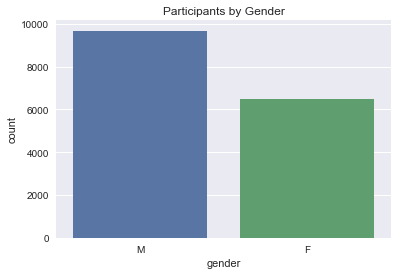

In [91]:
g = sns.countplot('gender', data=df)
g.set_title("Participants by Gender")

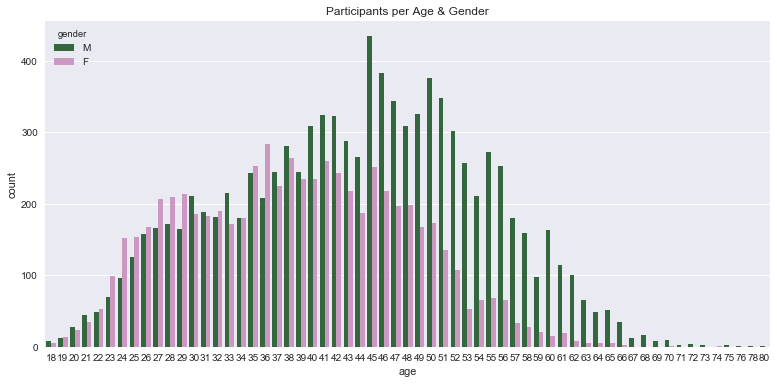

In [58]:
g = sns.countplot('age', data=df, palette="cubehelix", hue='gender')
g.figure.set_size_inches(13,6)
g.set_title("Participants per Age & Gender")

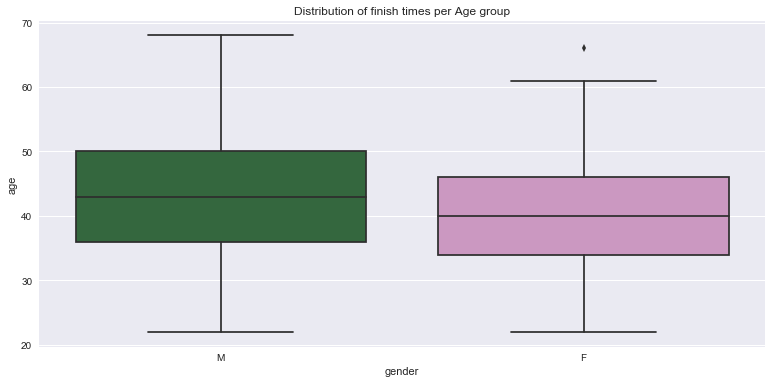

In [59]:
g = sns.boxplot(df2['gender'], df2['age'], palette="cubehelix")
g.figure.set_size_inches(13,6)
g.set_title("Distribution of finish times per Age group")

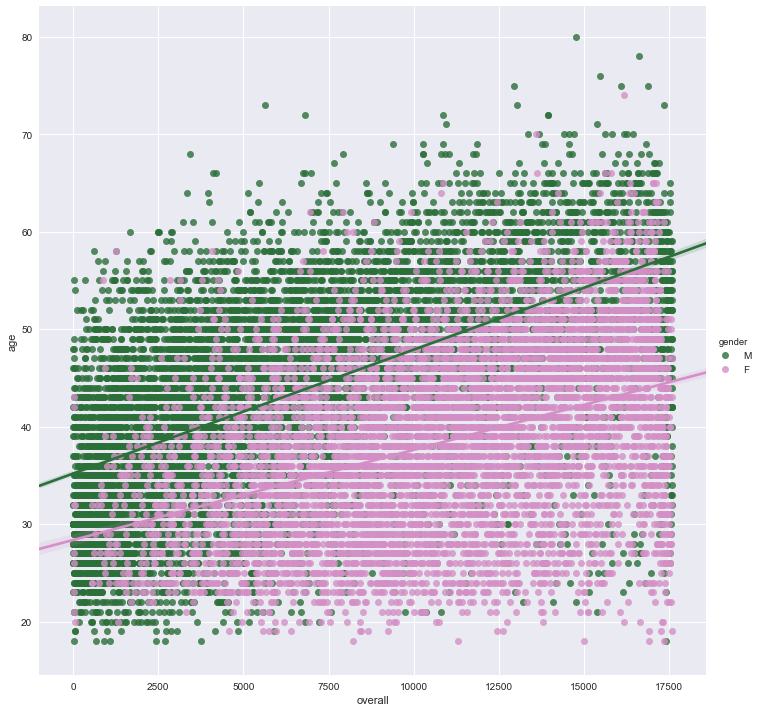

In [60]:
g = sns.lmplot(x='overall', y='age', data=df, hue='gender', palette="cubehelix", size=10)

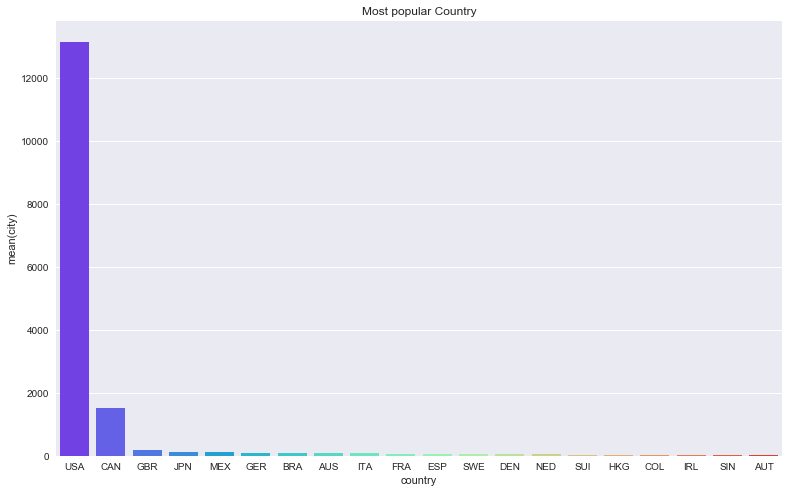

In [61]:
s = df.groupby('country').count()['city'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

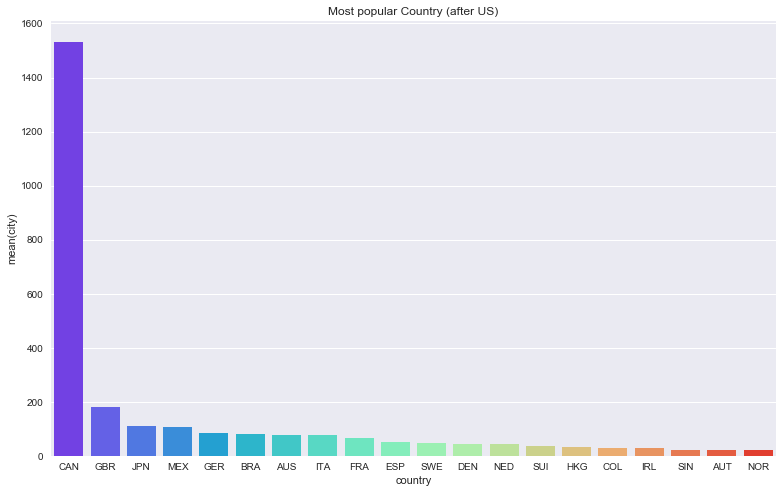

In [62]:
s = df.groupby('country').count()['city'].sort_values(ascending=False).head(21)[1:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US)")

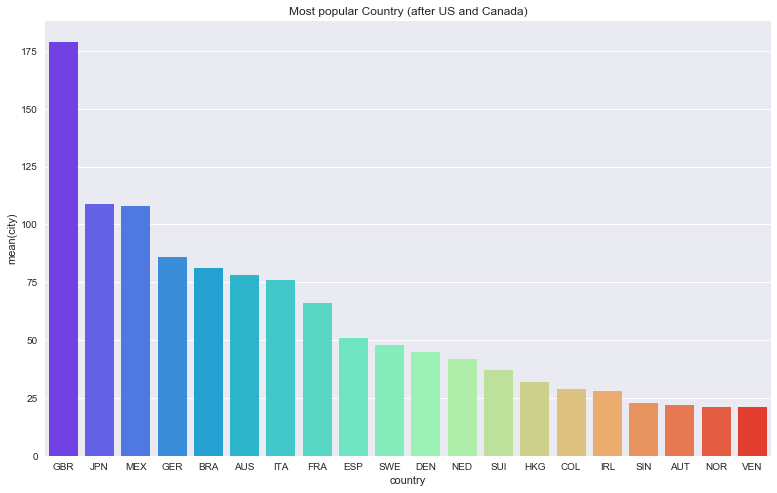

In [78]:
s = df.groupby('country').count()['city'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US and Canada)")

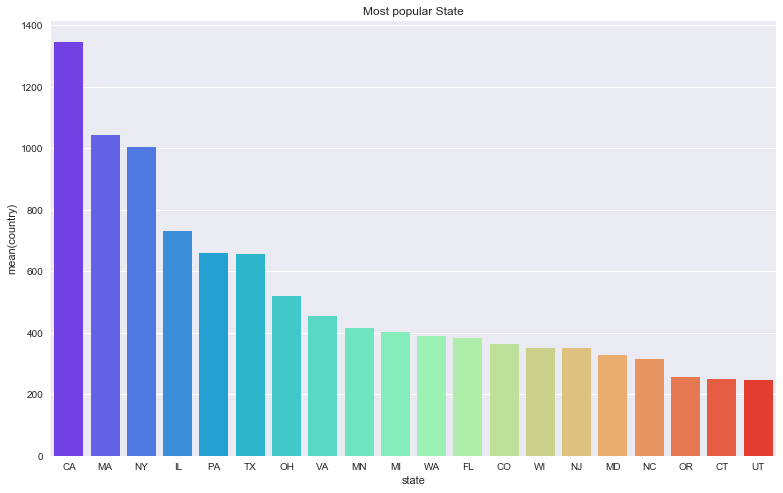

In [77]:
s = df[df['country'] == 'USA'].groupby('state').count()['country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="rainbow")
g.figure.set_size_inches(13,8)
g.set_title("Most popular State")

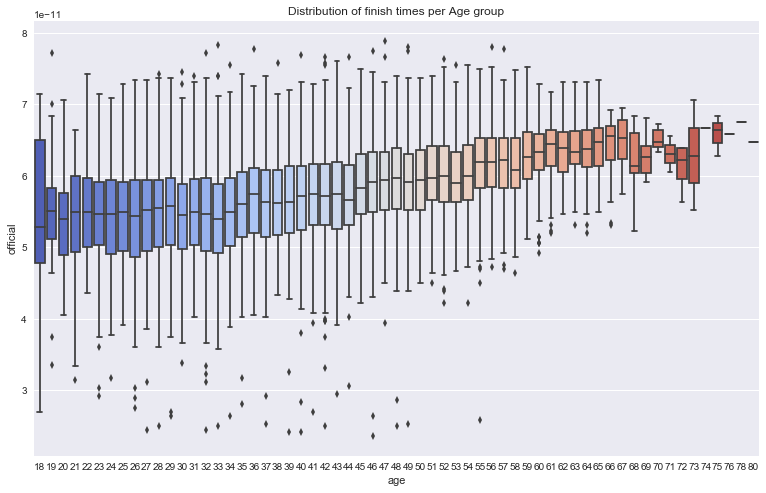

In [65]:
g = sns.boxplot(df['age'], df['official'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

In [94]:
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']

In [98]:
print(male['official'].mean())
print(female['official'].mean())

199.98130165289257
219.13972856261566


In [99]:
print(male['overall'].mean())
print(female['overall'].mean())

6729.094318181818
10967.729642196175


In [100]:
df['male'] = np.where(df['gender'] == 'M', 1, 0)

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [130]:
X = df[['male', 'age', 'half', '5k', '10k', '20k']]

In [131]:
y = df.overall

In [132]:
X_norm = normalize(X)

In [133]:
X_pca = PCA(2).fit_transform(X_norm)

In [136]:
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

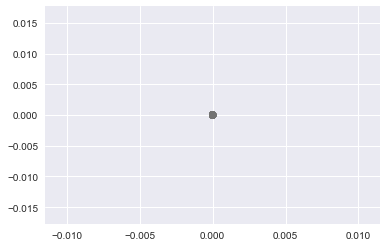

In [137]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()